## Aula 6 - Storytelling

### Gráficos com Multiplex

In [ ]:
# Instala a biblioteca multiplex
!pip install multiplex-plot networkx

In [ ]:
# Faz o download dos arquivos de estilo
!git clone https://github.com/NicholasMamo/multiplex-plot.git ../../multiplex

In [19]:
%load_ext autoreload
# Configura o reload automático dos módulos python antes de sua execução
%autoreload 2

import importlib
import os
import sys

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

#### Primeiro Exemplo de como usar a biblioteca Multiplex

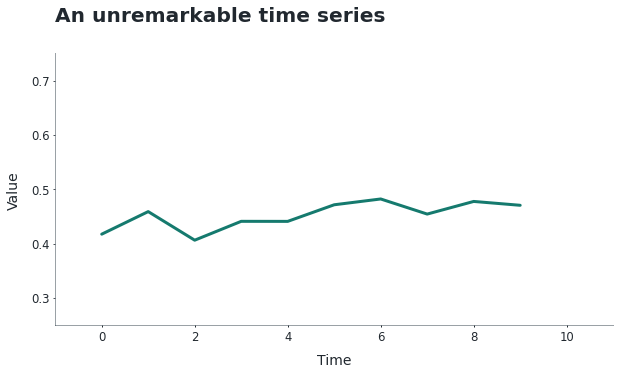

In [17]:
# import the Drawable class and set the style
from multiplex import drawable
drawable = importlib.reload(drawable)
plt.style.use(os.path.abspath('../../multiplex/styles/multiplex.style'))

# Gera os dados
x = range(10)
y = np.linspace(0.4, 0.5, num=10) + np.random.normal(0, 0.03, 10)

# Cria um estilo genérico
style = { 'color': 'C1' }

# Desenha a visualização
viz = drawable.Drawable(plt.figure(figsize=(10, 5)))
viz.plot(x, y, **style)

# Ajusta os limites do eixo x
viz.set_xlim(-1, 11)
# Ajusta os limites do eixo y
viz.set_ylim(0.25, 0.75)
# Ajusta o label do eixo x
viz.set_xlabel('Time')
# Ajusta o label do eixo y
viz.set_ylabel('Value')
# Ajusta o titulo do gráfico
viz.set_title('An unremarkable time series', loc='left')
# Mostra o gráfico
viz.show()

#### Exemplo 2 -  Usando a funcao timeseries e adicionando uma legenda ao gráfico

C:\Users\alex\.conda\envs\notebook3\lib\site-packages\multiplex\util.py:36: MatplotlibDeprecationWarning: 
The inverse_transformed function was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use transformed(transform.inverted()) instead.
  bb = component.get_window_extent(renderer).inverse_transformed(transform)


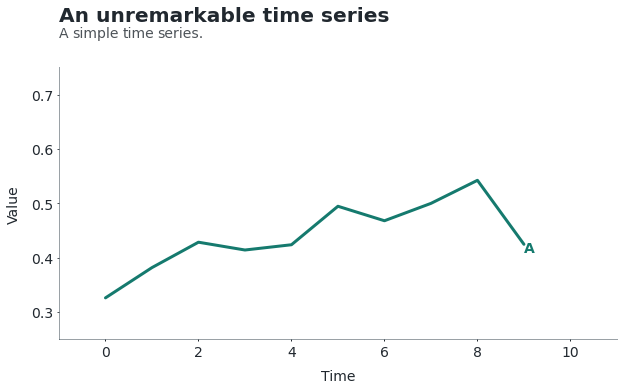

In [4]:
label_style = { 'fontweight': 700 }

# Desenha a visualização
viz = drawable.Drawable(plt.figure(figsize=(10, 5)))
viz.draw_time_series(x, y, label='A', label_style=label_style, **style)
# Ajusta os limites do eixo x
viz.set_xlim(-1, 11)
# Ajusta os limites do eixo y
viz.set_ylim(0.25, 0.75)
# Ajusta o label do eixo x
viz.set_xlabel('Time')
# Ajusta o label do eixo y
viz.set_ylabel('Value')
# Ajusta o titulo do gráfico
viz.set_title('An unremarkable time series', loc='left')
# Ajusta o texto do subtitulo do gráfico
viz.set_caption('A simple time series.')
# Mostra o gráfico
viz.show()

#### Testando o estilo Dark

C:\Users\alex\.conda\envs\notebook3\lib\site-packages\multiplex\util.py:36: MatplotlibDeprecationWarning: 
The inverse_transformed function was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use transformed(transform.inverted()) instead.
  bb = component.get_window_extent(renderer).inverse_transformed(transform)


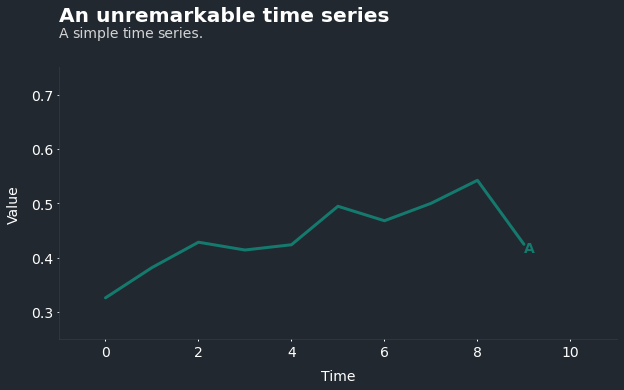

In [5]:
plt.style.use(os.path.abspath('../../multiplex/styles/multiplex-dark.style'))
label_style = { 'fontweight': 700 }

# Desenha a visualização
viz = drawable.Drawable(plt.figure(figsize=(10, 5)))
viz.draw_time_series(x, y, label='A', label_style=label_style, **style)

# Ajusta os limites do eixo x
viz.set_xlim(-1, 11)
# Ajusta os limites do eixo y
viz.set_ylim(0.25, 0.75)
# Ajusta o label do eixo x
viz.set_xlabel('Time')
# Ajusta o label do eixo y
viz.set_ylabel('Value')
# Ajusta o titulo do gráfico
viz.set_title('An unremarkable time series', loc='left')
# Ajusta o texto do subtitulo
viz.set_caption('A simple time series.')
# Mostra o gráfico
viz.show()

#### Gráfico de Barras

In [18]:
# Carrega o dataset de energia
df = pd.read_csv('../../multiplex/examples/data/energy.csv')
df.set_index('Region', inplace=True)
df

,Coal,Oil,Natural Gas,Nuclear,Renewable
Region,,,,,
China,4508568,10278,196400,248070,1708612
European Union,709362,60660,663311,829719,1035872
United States,1254542,38825,1513414,841329,786799


C:\Users\alex\.conda\envs\notebook3\lib\site-packages\multiplex\util.py:36: MatplotlibDeprecationWarning: 
The inverse_transformed function was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use transformed(transform.inverted()) instead.
  bb = component.get_window_extent(renderer).inverse_transformed(transform)


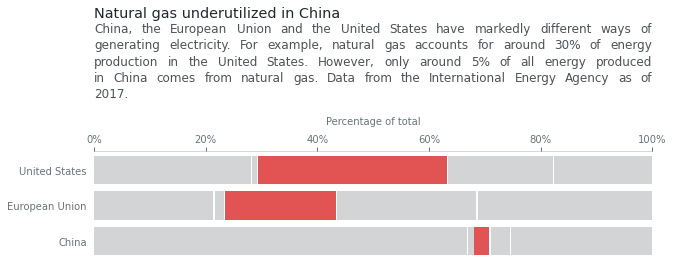

In [7]:
plt.style.use(os.path.abspath('../../multiplex/styles/modern.style'))

# Cria um estilo genérico
style = { 'alpha': 0.2, 'color': 'C0' }

# Cria um estilo específico para fazer o destaque dos valores de gás natural
highlight = { 'color': 'C1', 'alpha': 0.75 }

# Desenha a visualização
figure = plt.figure(figsize=(10, 2))
viz = drawable.Drawable(figure)
for region in df.index:
    values = df.loc[region].tolist()
    # Destaca os valores de gás natural
    values[2] = { 'value': values[2], 'style': highlight } 
    viz.draw_bar_100(values, region, **style)

# Personaliza o gráfico
# Ajusta o label do eixo x
viz.set_xlabel('Percentage of total')
# Ajusta o titulo do gráfico
viz.set_title('Natural gas underutilized in China', loc='left')
# Ajusta o texto do subtitulo do gráfico
viz.set_caption("""China, the European Union and the United States have markedly different ways of generating electricity.
                   For example, natural gas accounts for around 30% of energy production in the United States.
                   However, only around 5% of all energy produced in China comes from natural gas.
                   Data from the International Energy Agency as of 2017.""", align='justify')
# Mostra o gráfico
viz.show()

#### Gráfico de barras com highlight do índice

[4508568, 10278, 196400, 248070, 1708612]
[{'value': 4508568, 'label': 'Coal'}, {'value': 10278, 'label': 'Oil'}, {'value': 196400, 'label': 'Natural Gas', 'style': {'color': 'C1', 'alpha': 0.75}, 'label_style': {'alpha': 0.75}}, {'value': 248070, 'label': 'Nuclear'}, {'value': 1708612, 'label': 'Renewable'}]


C:\Users\alex\.conda\envs\notebook3\lib\site-packages\multiplex\util.py:36: MatplotlibDeprecationWarning: 
The inverse_transformed function was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use transformed(transform.inverted()) instead.
  bb = component.get_window_extent(renderer).inverse_transformed(transform)
C:\Users\alex\.conda\envs\notebook3\lib\site-packages\multiplex\util.py:36: MatplotlibDeprecationWarning: 
The inverse_transformed function was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use transformed(transform.inverted()) instead.
  bb = component.get_window_extent(renderer).inverse_transformed(transform)
C:\Users\alex\.conda\envs\notebook3\lib\site-packages\multiplex\util.py:36: MatplotlibDeprecationWarning: 
The inverse_transformed function was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use transformed(transform.inverted()) instead.
  bb = component.get_window_extent(renderer).inver

[709362, 60660, 663311, 829719, 1035872]
[{'value': 709362, 'label': 'Coal'}, {'value': 60660, 'label': 'Oil'}, {'value': 663311, 'label': 'Natural Gas', 'style': {'color': 'C1', 'alpha': 0.75}, 'label_style': {'alpha': 0.75}}, {'value': 829719, 'label': 'Nuclear'}, {'value': 1035872, 'label': 'Renewable'}]
[1254542, 38825, 1513414, 841329, 786799]
[{'value': 1254542, 'label': 'Coal'}, {'value': 38825, 'label': 'Oil'}, {'value': 1513414, 'label': 'Natural Gas', 'style': {'color': 'C1', 'alpha': 0.75}, 'label_style': {'alpha': 0.75}}, {'value': 841329, 'label': 'Nuclear'}, {'value': 786799, 'label': 'Renewable'}]


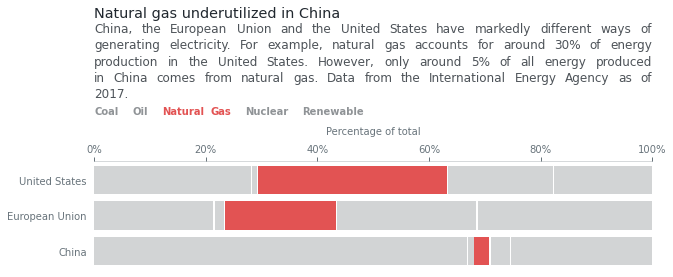

In [8]:
# Cria um estilo para os labels 
label_style = { 'alpha': 0.5, 'fontweight': 'bold' }

# create a specific style to highlight natural gas labels
highlight_label_style = { 'alpha': 0.75 }

# Desenha a visualização
figure = plt.figure(figsize=(10, 2))
viz = drawable.Drawable(figure)
labels = df.iloc[0].keys()

for region in df.index:
    values = df.loc[region].tolist()
    print(values)
    # converte todos os valores para dicionário
    values = [ { 'value': v, 'label': l} for v,l in zip(values, labels) ] 
    # Destaca o valor do gás natural
    values[2]['style'] = highlight 
    # Destaca o label do gás natural
    values[2]['label_style'] = highlight_label_style 
    print(values)
    # Desenha a linha desta iteração no gráfico
    viz.draw_bar_100(values, region, label_style=label_style,  **style)
    

# Personaliza a figura
viz.set_xlabel('Percentage of total')
# Ajusta o titulo do gráfico
viz.set_title('Natural gas underutilized in China', loc='left')
# Ajusta o subtitulo do gráfico
viz.set_caption("""China, the European Union and the United States have markedly different ways of generating electricity.
                   For example, natural gas accounts for around 30% of energy production in the United States.
                   However, only around 5% of all energy produced in China comes from natural gas.
                   Data from the International Energy Agency as of 2017.""", align='justify')
# Salva o gráfico em arquivo
viz.savefig('5-natural-gas.png', dpi=300, bbox_inches='tight')

#### Gráfico de série temporal

In [9]:
# load the data
df = pd.read_csv('../../multiplex/examples/data/global_temperatures.csv')
df.sort_values('Year', inplace=True)
df = df[df['Source'] == 'GISTEMP']
df.head()

,Source,Year,Mean
273,GISTEMP,1880,-0.20
271,GISTEMP,1881,-0.12
269,GISTEMP,1882,-0.10
267,GISTEMP,1883,-0.21
265,GISTEMP,1884,-0.28


C:\Users\alex\.conda\envs\notebook3\lib\site-packages\multiplex\util.py:36: MatplotlibDeprecationWarning: 
The inverse_transformed function was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use transformed(transform.inverted()) instead.
  bb = component.get_window_extent(renderer).inverse_transformed(transform)


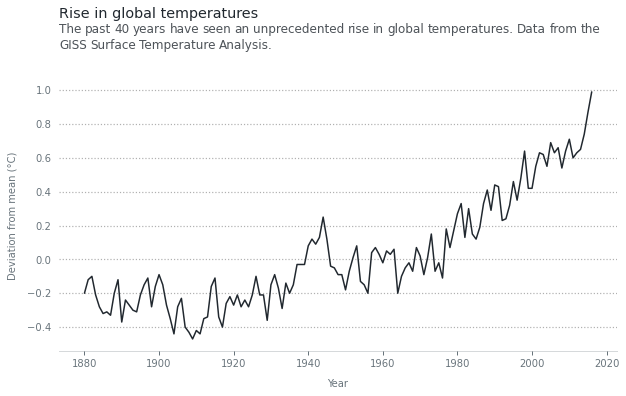

In [10]:
# importa a classe Drawable e ajusta o estilo
from multiplex import drawable
drawable = importlib.reload(drawable)
plt.style.use(os.path.abspath('../../multiplex/styles/modern.style'))

# Desenha a visualização
# Ajusta o tamanho da figura
figure = plt.figure(figsize=(10, 5))
viz = drawable.Drawable(figure)
# Desenha a série tempora
viz.draw_time_series(df.Year, df.Mean)

# Personaliza a figura
# Ajusta o label do eixo x
viz.set_xlabel('Year')
# Ajusta o label do eixo y
viz.set_ylabel('Deviation from mean (°C)')
# Ajusta o titulo do gráfico
viz.set_title('Rise in global temperatures', loc='left')
# Ajusta o subtitulo do gráfico
viz.set_caption("""The past 40 years have seen an unprecedented rise in global temperatures.
                   Data from the GISS Surface Temperature Analysis.""")
# Salva o gráfico em arquivo
viz.savefig('3-temperatures.png', dpi=300, bbox_inches='tight')


#### Timeseries com multiplas séries

In [11]:
# Carrega o dataset de gols da premier league
df = pd.read_csv('../../multiplex/examples/data/top_scorers.csv')
df.index = df['Matchday']
df.drop('Matchday', axis=1, inplace=True)
df.loc[0] = [0, 0, 0]
df.sort_index(inplace=True)
df.tail()

,Kane,Vardy,Aguero
Matchday,,,
34,24,22,22
35,24,22,23
36,25,22,23
37,25,24,24
38,25,24,24


C:\Users\alex\.conda\envs\notebook3\lib\site-packages\multiplex\util.py:36: MatplotlibDeprecationWarning: 
The inverse_transformed function was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use transformed(transform.inverted()) instead.
  bb = component.get_window_extent(renderer).inverse_transformed(transform)


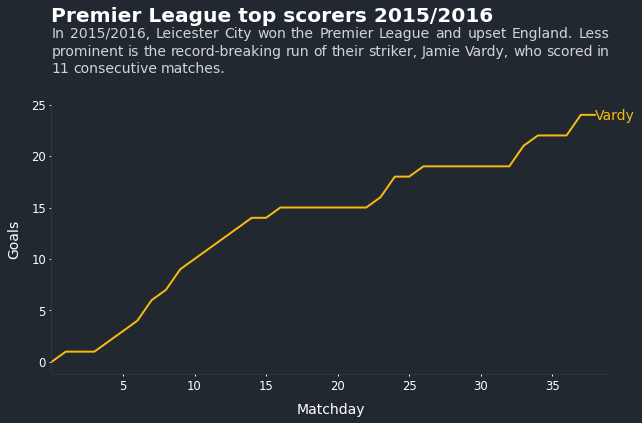

In [12]:
# Recarrega o estilo
plt.style.use(os.path.abspath('../../multiplex/styles/multiplex-dark.style'))

# Cria um estilo genérico
style = { 'linewidth': 2, 'label_style': { 'fontweight': 500 } }

# Cria um estilo específico para a série temporal do jogador Vardy
vardy_style = { 'color': '#F6B913', 'label': 'Vardy' }

# Desenha a visualização
figure = plt.figure(figsize=(10, 5))
viz = drawable.Drawable(figure)
viz.draw_time_series(df.index, df.Vardy, **style, **vardy_style)

# Ajusta os limites do eixo x
viz.set_xlim(0, 39)
# Ajusta os ticks do eixo x
viz.set_xticks(range(5, 38, 5))
# Ajusta o label do eixo x
viz.set_xlabel('Matchday')
# Ajusta o label do eixo y
viz.set_ylabel('Goals')
# Ajusta o titulo do gráfico
viz.set_title('Premier League top scorers 2015/2016', loc='left')
# Ajusta o subtitulo do gráfico
viz.set_caption("""In 2015/2016, Leicester City won the Premier League and upset England.
                   Less prominent is the record-breaking run of their striker, Jamie Vardy,
                   who scored in 11 consecutive matches.""", align='justify')
# Mostra o gráfico
viz.show()

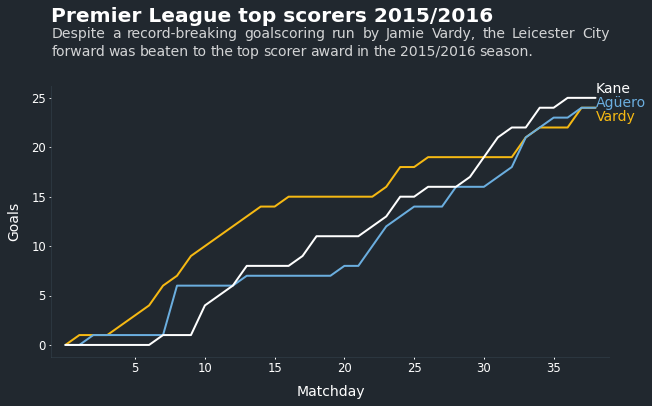

In [13]:
# Cria um estilo genérico
style = { 'linewidth': 2, 'label_style': { 'fontweight': 500 } }
# Cria um estilo específico para a série temporal dos 3 jogadores
kane_style = { 'color': '#FFFFFF', 'label': 'Kane' }
aguero_style = { 'color': '#6BAEDF', 'label': 'Agüero' }
vardy_style = { 'color': '#F6B913', 'label': 'Vardy' }

# Desenha a visualização
figure = plt.figure(figsize=(10, 5))
viz = drawable.Drawable(figure)
viz.draw_time_series(df.index.to_list(), df.Vardy.to_list(), **style, **vardy_style)
viz.draw_time_series(df.index.to_list(), df.Aguero.to_list(), **style, **aguero_style)
viz.draw_time_series(df.index.to_list(), df.Kane.to_list(), **style, **kane_style)

# Ajusta os limites do eixo x
viz.set_xlim(-1, 39)
# Ajusta os ticks do eixo x
viz.set_xticks(range(5, 38, 5))
# Ajusta o label do eixo x
viz.set_xlabel('Matchday')
# Ajusta o label do eixo y
viz.set_ylabel('Goals')
# Ajusta o titulo do gráfico
viz.set_title('Premier League top scorers 2015/2016', loc='left')
# Ajusta o subtitulo do gráfico
viz.set_caption("""Despite a record-breaking goalscoring run by Jamie Vardy,
                   the Leicester City forward was beaten to the top scorer award
                   in the 2015/2016 season.""", align='justify')
# Salva o gráfico em arquivo
viz.savefig('3-overlapping-labels.png', dpi=300, bbox_inches='tight')

### Personalização de Gráficos com o Matplotlib

In [14]:
# Fonte: https://www.kaggle.com/phillipheita/storytelling-with-data
# Considere o seguinte dataframe
df2 = pd.DataFrame({'Month':['January','February','March','April','May','June','July','August','September','October','November','December'],
                   'Ticket_Volume_Received':[160,184,241,149,180,161,132,202,160,139,149,177],
                   'Ticket_Volume_Processed':[160,184,237,148,181,150,123,156,126,104,124,140]})
names= ['January','February','March','April','May','June','July','August','September','October','November','December']
names2= ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

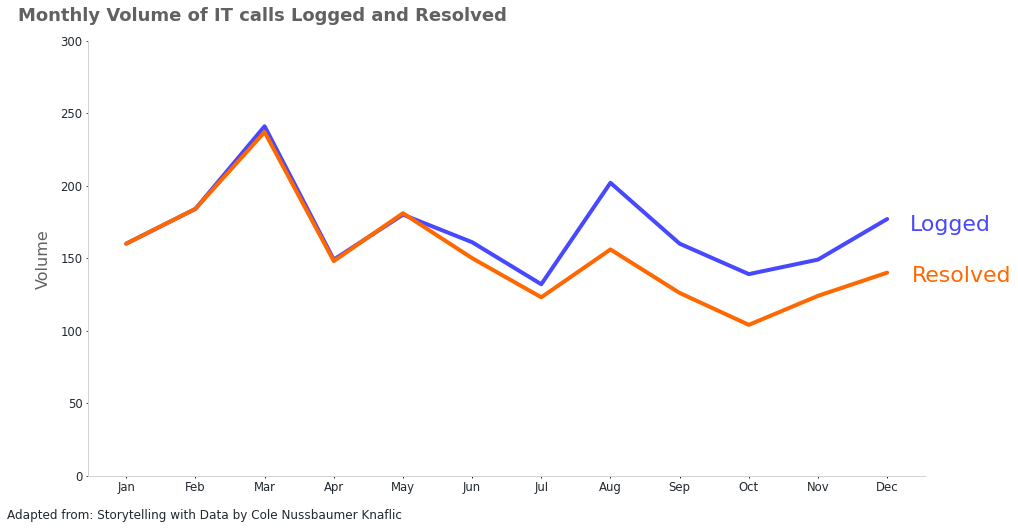

In [21]:
# Mostrar os gráficos do matplotlib na mesma janela do jupyter notebook
%matplotlib inline
# Ajusta o estilo
plt.style.use(os.path.abspath('../../multiplex/styles/multiplex.style'))
# Define um objeto de figura
fig = plt.figure(figsize=(15,8))
# Adiciona um subplot, pois uma figura pode ter vários plots
ax = fig.add_subplot()
# Desenha um gráfico de linhas com o dataset
# Plota cada linha. lw significa line width
sns.lineplot(x=df2.index,y='Ticket_Volume_Received',data=df2,lw=4,color='#4848FF',ax=ax)
sns.lineplot(x=df2.index,y='Ticket_Volume_Processed',data=df2,lw=4,color='#FF6800',ax=ax)
# Ajusta o título
plt.title('Monthly Volume of IT calls Logged and Resolved',fontsize=18,ha='right',color='#616161')

# Muda as cores das bordas esquerda e superior para ficarem igual ao fundo
ax.spines['left'].set_color('lightgray')
ax.spines['bottom'].set_color('lightgray')
# Escreve o texto da legenda das linhas sobre o gráfico
ax.text(12.5, 180, 'Logged', ha='right', va='top', fontsize=22,color='#4848FF')
ax.text(12.8, 145, 'Resolved', ha='right', va='top', fontsize=22,color='#FF6800')
# Ajusta os limites do eixo y
plt.ylim(0,300)
# Ajusta os ticks e os labels do eixo x
ax.set(xticks=range(0, 12), xticklabels=list(names2))
# Ajusta o texto, tamanho da fonte e cor do label do eixo y
plt.ylabel('Volume',fontsize=16,color='#616161')
# Adiciona um texto a parte inferior da figura
t = fig.text(
        0.05, 0.05,
        'Adapted from: Storytelling with Data by Cole Nussbaumer Knaflic',
        ha='left',fontsize=12)

#### Cheat sheet do Matplotlib

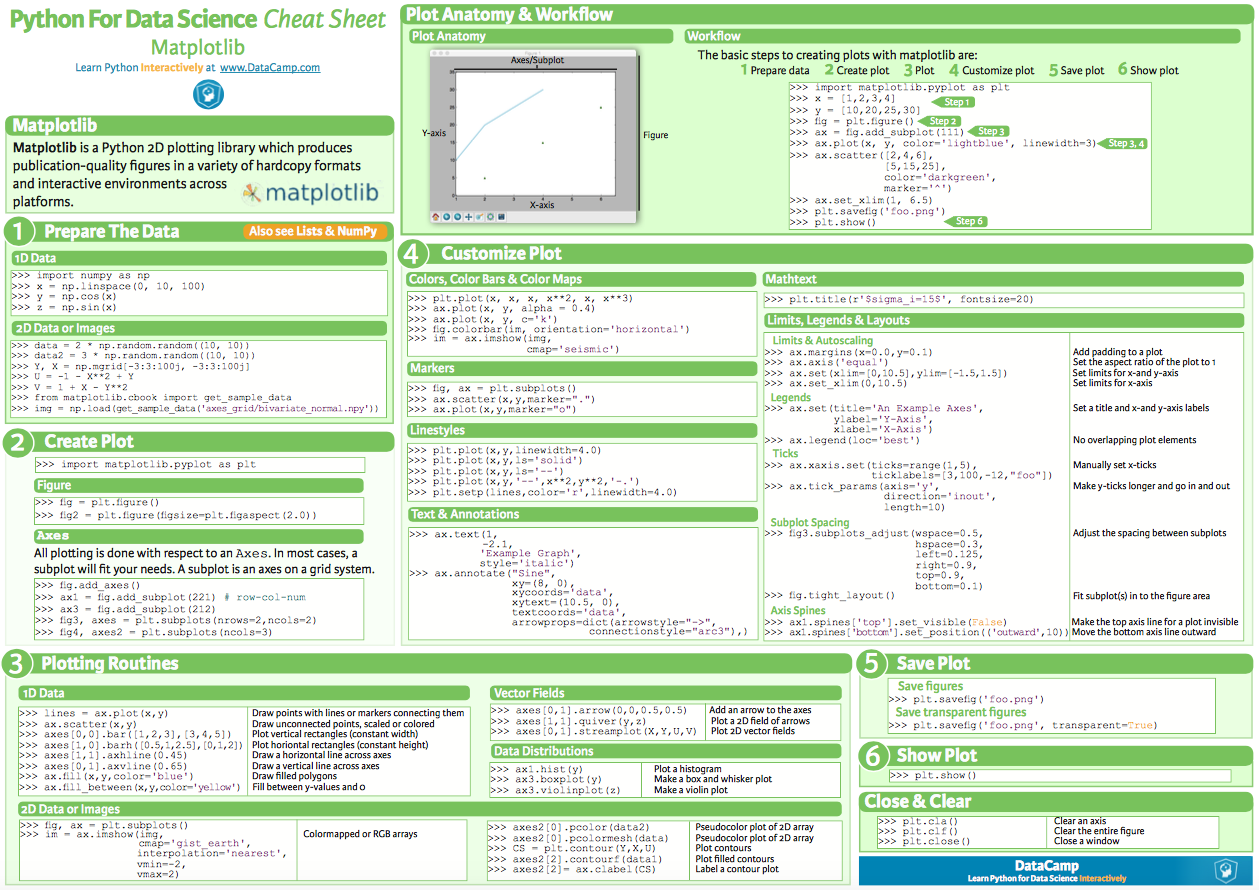

### Regex

In [22]:
import re

In [47]:
# Encontrar todos os termos de uma string que são compostos por letras
# ou números
g = re.findall(r'[a-zA-Z0-9]+',  'ABCDE2 2Fab.(cdef1 23 450 345#aaa')
g

['ABCDE2', '2Fab', 'cdef1', '23', '450', '345', 'aaa']

In [50]:
result1 = re.search('^\w+',  'teste 1')
print(result1)

<_sre.SRE_Match object; span=(0, 5), match='teste'>


In [51]:
result2 = re.search('^\w+',  '#teste 2')
print(result2)

None


In [21]:
# Criar uma função pra testar se uma string atende a uma regex
def test_regex(s):
    pat = '^\w+'
    if re.search(pat, s):
        return True
    else:
        return False

test_regex('#teste 2')

NameError: name 're' is not defined

In [3]:
# Construa uma série com o conteúdo ['foo', 'fuz', np.nan] e faça um replace com regex
# usando a expressão regular 'f.' substituindo por 'ba'. Use o parâmetro regex=True
pd.Series(['foo', 'fuz', np.nan]).str.replace('f.', 'ba', regex=True)

0    bao
1    baz
2    NaN
dtype: object

In [4]:
# Construa uma série com o conteúdo ['f.o', 'fuz', np.nan] e faça um replace sem regex
# da string 'f.' substituindo por 'ba'. Use o parâmetro regex=False.
pd.Series(['f.o', 'fuz', np.nan]).str.replace('f.', 'ba', regex=False)

0    bao
1    fuz
2    NaN
dtype: object

In [ ]:
# Considere a seguinte função lambda
repl = lambda m: m.group(0)[::-1]
# Construa uma série com o conteúdo ['foo 123', 'bar baz', np.nan] e faça um replace com
# regex usando a expressão regular '[a-z]+' substituindo pela função lambda definida acima. 
# Use o parâmetro regex=True.
pd.Series(['foo 123', 'bar baz', np.nan]).str.replace(r'[a-z]+', repl)